In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error

In [2]:
pwd()

'c:\\Users\\v97na\\Documents\\Personal\\Regression'

In [3]:
cc_df = pd.read_excel("default of credit card clients.xls")

In [4]:
cc_df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [6]:
cc_df.dropna(how='all', axis='columns', inplace=True)

In [7]:
cc_df.columns = cc_df.loc[0].to_list()

In [8]:
cc_df = cc_df.drop(0)

In [9]:
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [10]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [11]:
for col in cc_df.columns[:6]:
  cc_df[col] = cc_df[col].astype('int')

In [12]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int32 
 1   LIMIT_BAL                   30000 non-null  int32 
 2   SEX                         30000 non-null  int32 
 3   EDUCATION                   30000 non-null  int32 
 4   MARRIAGE                    30000 non-null  int32 
 5   AGE                         30000 non-null  int32 
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [13]:
cc_df['default payment next month'] = cc_df['default payment next month'].astype('int')

In [14]:
for col in cc_df.columns[6:24]:
  cc_df[col] = cc_df[col].astype('float')

In [15]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int32  
 1   LIMIT_BAL                   30000 non-null  int32  
 2   SEX                         30000 non-null  int32  
 3   EDUCATION                   30000 non-null  int32  
 4   MARRIAGE                    30000 non-null  int32  
 5   AGE                         30000 non-null  int32  
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [16]:
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,2,120000,2,2,2,26,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,3,90000,2,2,2,34,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,4,50000,2,2,1,37,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,5,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,29997,150000,1,3,2,43,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,29998,30000,1,2,2,37,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29999,29999,80000,1,3,1,41,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [17]:
nRow, nCol = cc_df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 30000 rows and 25 columns


In [18]:
cc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [19]:
cc_df.rename(columns={'default payment next month':'def_pay'}, inplace=True)
cc_df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [20]:
cc_df.isna().sum()  

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
def_pay      0
dtype: int64

<AxesSubplot:>

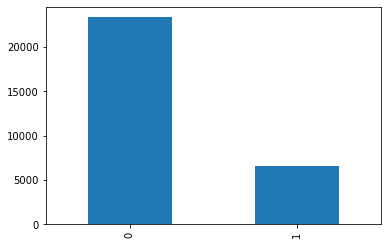

In [21]:
cc_df.def_pay.value_counts().plot.bar()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


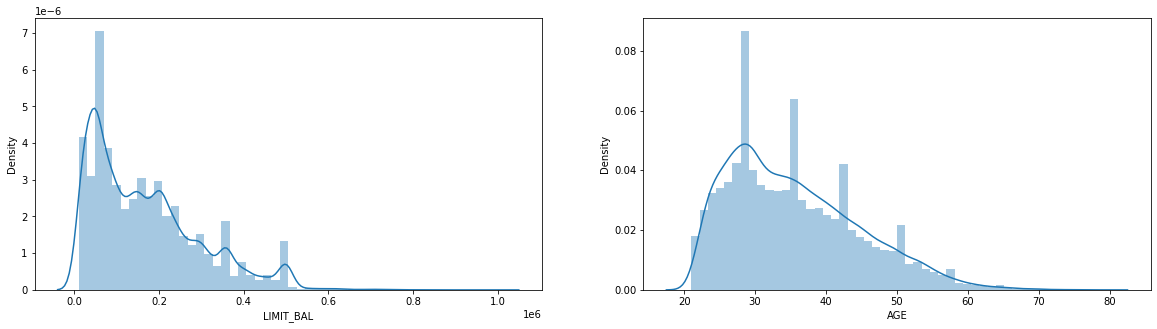

In [22]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(cc_df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(cc_df.AGE)

plt.show()

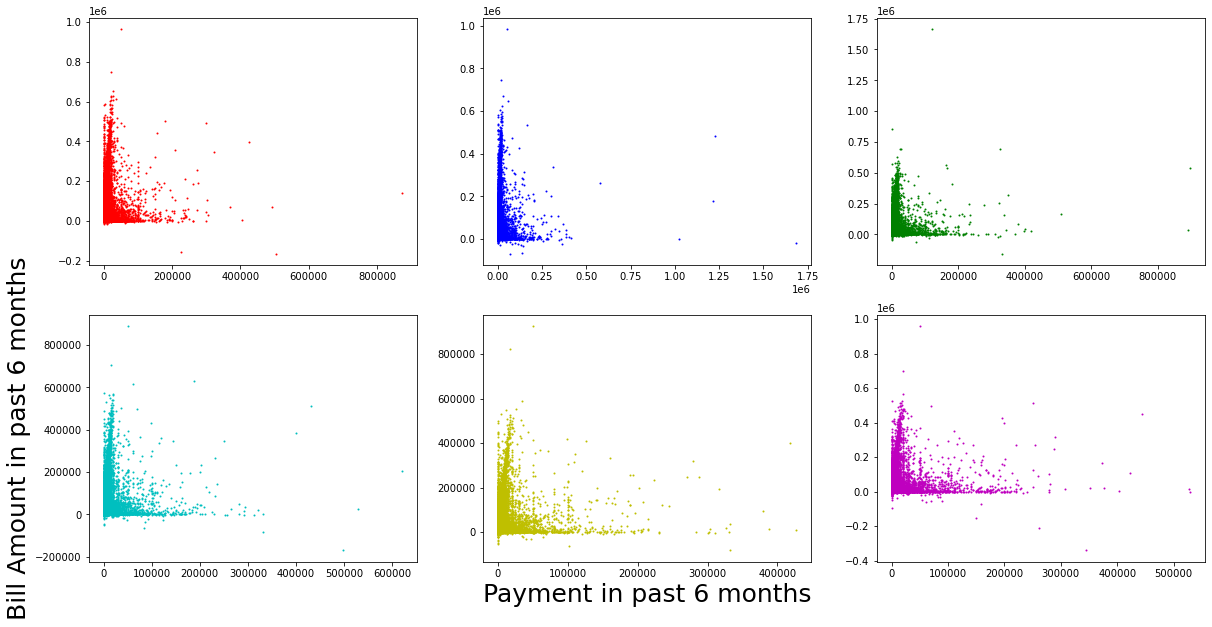

In [23]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=cc_df.PAY_AMT1, y=cc_df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=cc_df.PAY_AMT2, y=cc_df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=cc_df.PAY_AMT3, y=cc_df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=cc_df.PAY_AMT4, y=cc_df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=cc_df.PAY_AMT5, y=cc_df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=cc_df.PAY_AMT6, y=cc_df.BILL_AMT6, c='m', s=1)

plt.show()

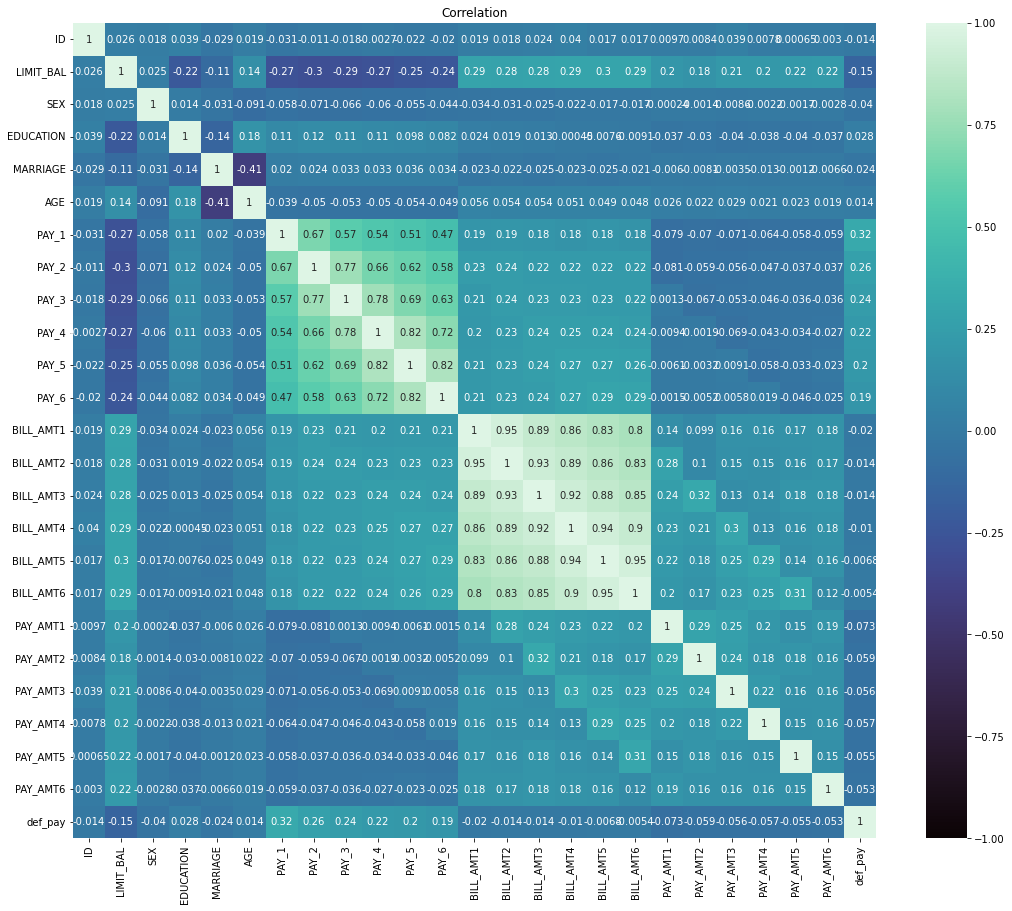

In [24]:
corr= cc_df.corr()

#Plot heatmap
plt.figure(figsize=(18,15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap ='mako')
plt.title('Correlation')
plt.show()

In [26]:
cc_df_X = cc_df.drop(['def_pay'], axis=1)
cc_df_y = cc_df.def_pay

X_train, X_test, y_train, y_test = train_test_split(cc_df_X, cc_df_y, test_size=0.2, random_state=10)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5998
           1       0.00      0.00      0.00         2

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4681 1317]
 [   2    0]]

Accuracy Score for model1:  0.7801666666666667


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We can see that All the examples are predicted to be negative to default payment next month with 78% accuracy whereas in the dataset we have 980 observations that are expected to default payment.
After doing various random sampling by changing the random_date parameter, we found random_state=10 to be giving highest accuracy for our model1

Lets now try finding out the collinearity in the dataset by VIF

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
cc_df_vif = cc_df.drop(columns='def_pay')

In [32]:
vif_data = pd.DataFrame()
vif_data["feature"] = cc_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(cc_df_vif.values, i) for i in range(len(cc_df_vif.columns))]

In [33]:
vif_data
"""
Sex, Age, Bill_amt1, Bill_amt2, Bill_amt3, Bill_amt4, Bill_amt5, Bill_amt6 are highly co-related
"""


,feature,VIF
0,ID,3.900152
1,LIMIT_BAL,4.046427
2,SEX,9.247174
3,EDUCATION,6.798256
4,MARRIAGE,6.439144
5,AGE,11.216099
6,PAY_1,1.919145
7,PAY_2,3.212863
8,PAY_3,3.728466
9,PAY_4,4.445545


In [35]:
cc_df.T

,1,2,3,4,5,6,7,8,9,10,...,29991,29992,29993,29994,29995,29996,29997,29998,29999,30000
ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,29991.0,29992.0,29993.0,29994.0,29995.0,29996.0,29997.0,29998.0,29999.0,30000.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0,50000.0,500000.0,100000.0,140000.0,20000.0,...,140000.0,210000.0,10000.0,100000.0,80000.0,220000.0,150000.0,30000.0,80000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,3.0,...,2.0,2.0,3.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0,37.0,29.0,23.0,28.0,35.0,...,41.0,34.0,43.0,38.0,34.0,39.0,43.0,37.0,41.0,46.0
PAY_1,2.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,3.0,0.0,0.0,2.0,0.0,-1.0,4.0,1.0,0.0
PAY_2,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-2.0,...,0.0,2.0,0.0,-1.0,2.0,0.0,-1.0,3.0,-1.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,2.0,-2.0,...,0.0,2.0,0.0,-1.0,2.0,0.0,-1.0,2.0,0.0,0.0
PAY_4,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,...,0.0,2.0,-2.0,0.0,2.0,0.0,-1.0,-1.0,0.0,0.0
